In [1]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math



In [ ]:
#reading in dataset
titanic_data = sns.load_dataset("titanic")

In [2]:
titanic_data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:

titanic_data.describe(include= "object")

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [5]:
print("The size of titanic_dataset is", titanic_data.shape)
print("The total number of passengers that board the titanic ship is", str(len(titanic_data.index)))

The size of titanic_dataset is (891, 15)
The total number of passengers that board the titanic ship is 891


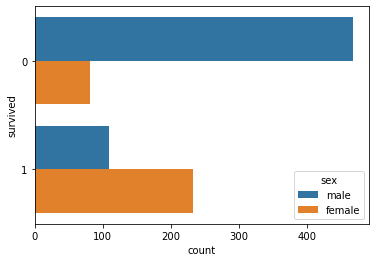

<AxesSubplot:xlabel='survived', ylabel='count'>

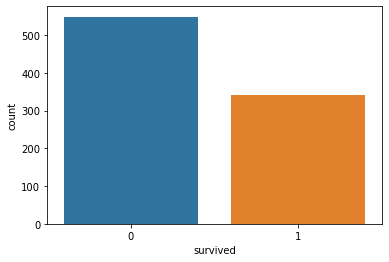

In [6]:
sns.countplot( y = "survived",hue ="sex", data = titanic_data)
plt.show()
sns.countplot(x="survived", data = titanic_data)

<AxesSubplot:xlabel='survived', ylabel='count'>

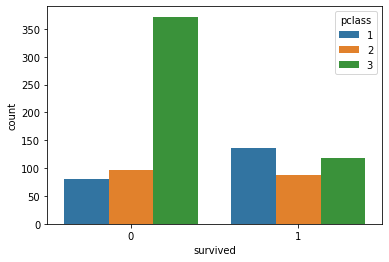

In [7]:
sns.countplot(x = "survived", hue="pclass", data = titanic_data )

<AxesSubplot:ylabel='Frequency'>

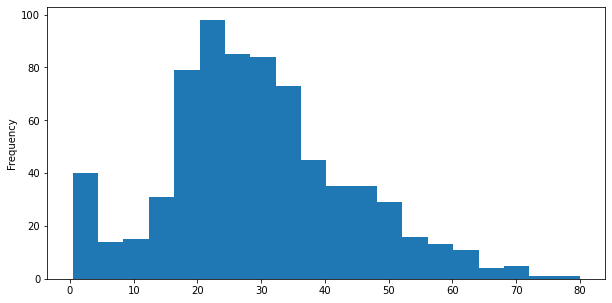

In [8]:
titanic_data.age.plot.hist(bins = 20,figsize =(10,5) )

<AxesSubplot:ylabel='Frequency'>

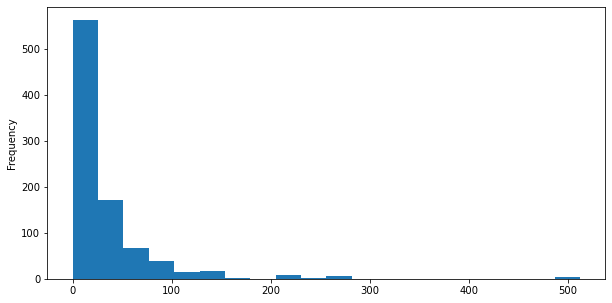

In [9]:
titanic_data.fare.plot.hist(bins=20,figsize=(10,5))

In [10]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<AxesSubplot:xlabel='sibsp', ylabel='count'>

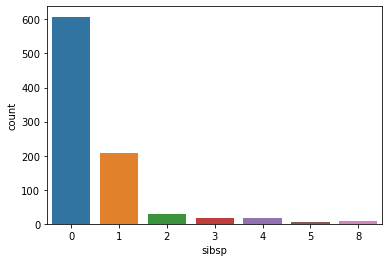

In [11]:
sns.countplot(x = "sibsp", data = titanic_data)

In [12]:
titanic_data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

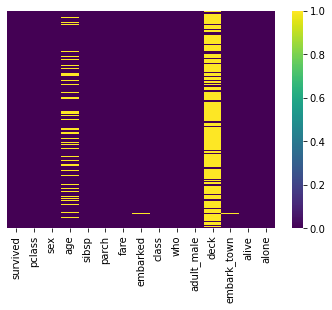

In [14]:
## Using heat_map to show null data
sns.heatmap(titanic_data.isnull(), yticklabels = False, cmap = "viridis")

In [15]:
titanic_data_copy = titanic_data.copy()
titanic_data_copy.columns
titanic_data_copy.drop("deck",axis = 1,inplace = True)

In [16]:
titanic_data_copy.dropna(inplace=True)
titanic_data_copy.shape

(712, 14)

In [17]:
titanic_data_copy.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [18]:
print(titanic_data_copy.shape,titanic_data.shape)

(712, 14) (891, 15)


<AxesSubplot:xlabel='pclass', ylabel='age'>

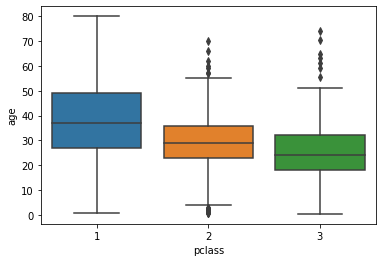

In [19]:
sns.boxplot(y="age",x="pclass",data=titanic_data)

<AxesSubplot:xlabel='pclass', ylabel='age'>

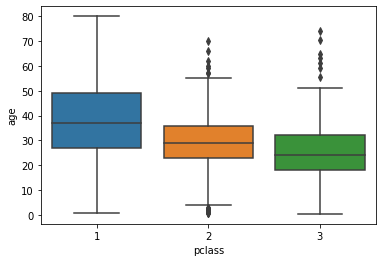

In [20]:
sns.boxplot(y="age",x="pclass",data=titanic_data_copy)

In [21]:
titanic_data_copy.head(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True


In [22]:
titanic_data_copy["Age_group"] = titanic_data_copy["who"] == "child" 

In [23]:
titanic_data_copy["Age_group"].replace({True : "child", False : "Adult"}, inplace = True)

<AxesSubplot:xlabel='survived', ylabel='count'>

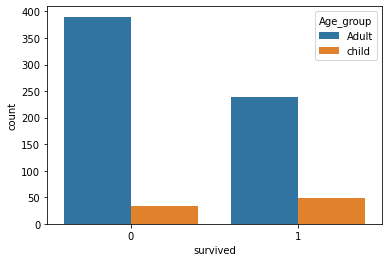

In [24]:
sns.countplot(x = "survived", hue = "Age_group", data = titanic_data_copy )

In [25]:
titanic_data_copy.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,Age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Adult


In [26]:
sex = pd.get_dummies(titanic_data_copy["sex"],drop_first = True)


In [27]:
embark_town = pd.get_dummies(titanic_data_copy["embark_town"],drop_first = True)

In [28]:
titanic_data_copy.drop(["alone","alive","embarked","class","who","adult_male"],axis = 1,inplace= True)

In [29]:
titanic_data_copy.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,Age_group
0,0,3,male,22.0,1,0,7.2500,Southampton,Adult
1,1,1,female,38.0,1,0,71.2833,Cherbourg,Adult
2,1,3,female,26.0,0,0,7.9250,Southampton,Adult
3,1,1,female,35.0,1,0,53.1000,Southampton,Adult
4,0,3,male,35.0,0,0,8.0500,Southampton,Adult


In [30]:
embark_town = pd.get_dummies(titanic_data_copy["embark_town"],drop_first = True)
sex = pd.get_dummies(titanic_data_copy["sex"],drop_first = True)
ageclass = pd.get_dummies(titanic_data_copy["Age_group"],drop_first = True)
pc1 = pd.get_dummies(titanic_data_copy["pclass"],drop_first = True)

In [31]:
new_titanic_data = pd.concat([titanic_data_copy,embark_town,sex,ageclass,pc1],axis = 1)

In [32]:
new_titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,Age_group,Queenstown,Southampton,male,child,2,3
0,0,3,male,22.0,1,0,7.2500,Southampton,Adult,0,1,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,Cherbourg,Adult,0,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,Southampton,Adult,0,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,Southampton,Adult,0,1,0,0,0,0
4,0,3,male,35.0,0,0,8.0500,Southampton,Adult,0,1,1,0,0,1


In [33]:
new_titanic_data.drop(["sex","embark_town","Age_group"],axis = 1,inplace = True)

In [34]:
new_titanic_data.drop("pclass",axis= 1, inplace = True)

In [35]:
new_titanic_data.reset_index(drop = True, inplace=True)

In [36]:
new_titanic_data

,survived,age,sibsp,parch,fare,Queenstown,Southampton,male,child,2,3
0,0,22.0,1,0,7.2500,0,1,1,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,0,1
3,1,35.0,1,0,53.1000,0,1,0,0,0,0
4,0,35.0,0,0,8.0500,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
707,0,39.0,0,5,29.1250,1,0,0,0,0,1
708,0,27.0,0,0,13.0000,0,1,1,0,1,0
709,1,19.0,0,0,30.0000,0,1,0,0,0,0
710,1,26.0,0,0,30.0000,0,0,1,0,0,0


### Train data for model 1

In [37]:
x = new_titanic_data.drop("survived",axis = 1)
y = new_titanic_data["survived"]

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logmodel = LogisticRegression(max_iter=400)

In [42]:
logmodel.fit(X_train, y_train )

LogisticRegression(max_iter=400)

In [43]:
prediction = logmodel.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.82      0.86      0.84       126\n           1       0.78      0.74      0.76        88\n\n    accuracy                           0.81       214\n   macro avg       0.80      0.80      0.80       214\nweighted avg       0.81      0.81      0.81       214\n'

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test,prediction)

array([[108,  18],
       [ 23,  65]], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test,prediction)*100


80.8411214953271

In [50]:

titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [51]:
copy2_titanic_data = titanic_data.copy()

In [52]:
copy2_titanic_data.drop(["deck","embarked","class","alive"],axis = 1, inplace = True)

In [53]:
copy2_titanic_data.dropna(inplace=True)

In [54]:
copy2_titanic_data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


In [55]:
copy2_titanic_data["age_class"] = copy2_titanic_data["who"] =="child"

In [56]:
copy2_titanic_data["age_class"].replace({True : "Child",False:"Adult"},inplace=True)

In [57]:

copy2_titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,age_class
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False,Adult
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False,Adult
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True,Adult
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False,Adult
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,woman,False,Queenstown,False,Adult
886,0,2,male,27.0,0,0,13.0000,man,True,Southampton,True,Adult
887,1,1,female,19.0,0,0,30.0000,woman,False,Southampton,True,Adult
889,1,1,male,26.0,0,0,30.0000,man,True,Cherbourg,True,Adult


In [58]:
sex1 = pd.get_dummies(copy2_titanic_data["sex"], drop_first = True)
pclass1 = pd.get_dummies(copy2_titanic_data["pclass"], drop_first = True)
embark1 = pd.get_dummies(copy2_titanic_data["embark_town"],drop_first=True)

new_copy2_titanic_data = pd.concat([copy2_titanic_data,embark1,sex1,pclass1],axis = 1)

In [59]:
new_copy2_titanic_data.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,age_class,Queenstown,Southampton,male,2,3
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False,Adult,0,1,1,0,1
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False,Adult,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True,Adult,0,1,0,0,1


In [60]:
new_copy2_titanic_data.drop(["pclass","sex","who","embark_town","adult_male"],axis=1,inplace=True)

In [61]:
new_copy2_titanic_data

,survived,age,sibsp,parch,fare,alone,age_class,Queenstown,Southampton,male,2,3
0,0,22.0,1,0,7.2500,False,Adult,0,1,1,0,1
1,1,38.0,1,0,71.2833,False,Adult,0,0,0,0,0
2,1,26.0,0,0,7.9250,True,Adult,0,1,0,0,1
3,1,35.0,1,0,53.1000,False,Adult,0,1,0,0,0
4,0,35.0,0,0,8.0500,True,Adult,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,False,Adult,1,0,0,0,1
886,0,27.0,0,0,13.0000,True,Adult,0,1,1,1,0
887,1,19.0,0,0,30.0000,True,Adult,0,1,0,0,0
889,1,26.0,0,0,30.0000,True,Adult,0,0,1,0,0


### Train data for model 2

In [62]:
x2 = new_copy2_titanic_data.drop("survived",axis = 1)
y2  = new_copy2_titanic_data["survived"]

In [63]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(x, y, test_size=0.3, random_state=0
                                                       )

In [64]:
#scaling input values
from sklearn.preprocessing import StandardScaler

In [65]:
# sc = StandardScaler()
# X2_train = sc.fit_transform(X2_train)
# X2_test = sc.transform(X2_test)


In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
classifier = LogisticRegression(max_iter=400, random_state=42)
classifier.fit(X2_train,y2_train)

LogisticRegression(max_iter=400, random_state=42)

In [68]:
y_pred = classifier.predict(X2_test)

In [69]:
from sklearn.metrics import accuracy_score


In [70]:
accuracy_score(y2_test,y_pred)*100

77.10280373831776

In [71]:
logmodel.fit(X2_train, y2_train )

LogisticRegression(max_iter=400)

In [72]:
prediction = logmodel.predict(X2_test)

In [73]:
classification_report(y2_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.78      0.85      0.81       125\n           1       0.76      0.66      0.71        89\n\n    accuracy                           0.77       214\n   macro avg       0.77      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [74]:
accuracy_score(y2_test,prediction)*100

77.10280373831776